In [3]:
!pip install scanpy


#adding a new comment

  Using cached scanpy-1.9.3-py3-none-any.whl (2.0 MB)
  Using cached session_info-1.0.0-py3-none-any.whl
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached statsmodels-0.14.0-cp310-cp310-win_amd64.whl (9.2 MB)
  Using cached anndata-0.9.1-py3-none-any.whl (102 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached natsort-8.3.1-py3-none-any.whl (38 kB)
  Using cached pandas-2.0.2-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached numba-0.57.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached h5py-3.8.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached llvmlite-0.40.0-cp310-cp310-win_amd64.whl (27.7 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python310\\share'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import scanpy as sc

ModuleNotFoundError: No module named 'pandas'

In [ ]:
sc.settings.verbosity = 3            
sc.logging.print_header() #helps identify the version of Scanpy and any other relevant information in the log.
sc.settings.set_figure_params(dpi=80, facecolor='white') #Sets the parameters for figures
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10


verbosity: errors (0), warnings (1), info (2), hints (3)

In [ ]:
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
!mkdir write

--2023-06-03 11:15:15--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2023-06-03 11:15:15--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  25.7MB/s    in 0.3s    

2023-06-03 11:15:16 (25.7 MB/s) - ‘data/pbmc3k_filtered_gene_bc_matri

In [ ]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True) 

... writing an h5ad cache file to speedup reading next time


In [ ]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

adata.var_names_make_unique()  

*   unnecessary if you used var_names='gene_ids' when loading the data with sc.read_10x_mtx().
*   When var_names='gene_ids' is specified, Scanpy automatically assigns unique names to the variables (genes) based on the gene IDs from the input data.
*   adata.var_names_make_unique() automatically appends a unique suffix to any duplicate variable names to make them unique.

In [ ]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

adata.X:  

*   This attribute stores the main data matrix, typically referred to as X.
*   It is a 2-dimensional array-like object (e.g., NumPy array) that represents the gene expression values in each cell.


*   it can be raw counts, normalized values, or any other transformed representation of the data.

* Rows correspond to cells and columns correspond to genes


adata.obs: 

*   This observation stores metadata of cell.

*   Each row corresponds to a cell, and each column represents an attribute associated with that cell.

* For example, it may include information such as cell IDs, cell types


adata.var:

*   This observation stores metadata of Gene.

*   Each row corresponds to a gene, and each column represents an attribute associated with that gene.

* For example, it may include information such as gene names, gene symbols, or gene IDs.


adata.obsm: 
 




adata.varm: 

*   it stores additional gene-level feature matrices in data structure like (Dictonary). 
*   Each key represents the name of a specific feature matrix, and the corresponding value is a 2-D array-like object containing gene-level features.

adata.uns: 

*   dictionary-like object that stores additional information associated with the AnnData object. 
*   It can be used to store custom information, analysis results, or any other relevant data that is not part of the standard attributes.

normalizing counts per cell
    finished (0:00:00)


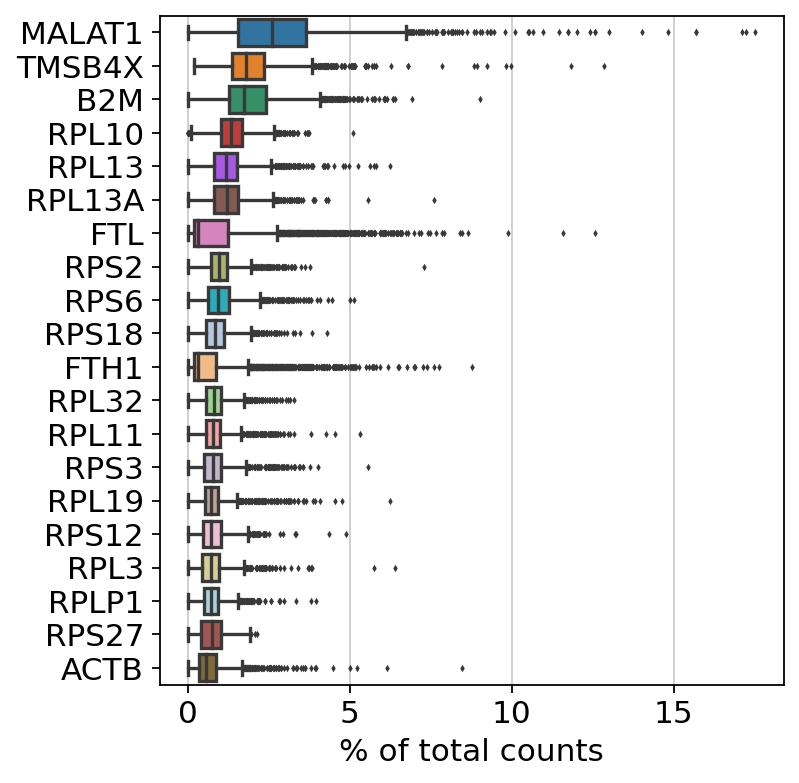

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

sc.pl.highest_expr_genes()

* Plotting function provided by Scanpy that allows you to visualize the highest expressed genes in your scRNA-seq dataset. 
* Gene expression levels refer to how much mRNA is being produced by a particular gene in a given cell.
* This information helps researchers understand which genes are more or less active in different cells and conditions.

n_top=20: 


*   number of top genes to visualize
*   By default, it is set to 20

In [ ]:
#Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


sc.pp.filter_cells(adata, min_genes=200): 

*   filters out cells (observations) from your AnnData object (adata) based on a minimum number of expressed genes.
*   here it filters out cells that have fewer than 200 expressed genes.


sc.pp.filter_genes(adata, min_cells=3): 

*   filters out genes (variables) from your AnnData object based on a minimum number of cells in which the gene is expressed.
*   Here it filters out genes that are expressed in fewer than 3 cells. 

After executing this code, the filter_cells() and filter_genes() functions will modify the adata object by removing cells and genes that do not meet the specified filtering criteria.

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata.var['mt'] = adata.var_names.str.startswith('MT-'):


*   Create a new column named 'mt' in the var attribute of your AnnData object (adata).
*   The column contains boolean values (True or False) indicating whether each gene name starts with 'MT-' (common prefix for mitochondrial genes)



*   it helps to annotate and identify the mitochondrial genes in your dataset


sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True): 

*   calculates quality control (QC) metrics for your dataset using the specified variables (genes).

*   Here calculating QC metrics specifically for the mitochondrial genes ('mt').

*  percent_top=None: 
Indicates that We don't want to consider a specific top percentage of genes for the calculation.
*   -log1p=False: 
Specifies that you don't want to apply a logarithmic transformation to the QC metrics.


*   log1p=True is often used because scRNA-seq data tends to have a skewed distribution, meaning some values are much higher or lower than others.


*   -inplace=True: QC metrics are stored directly in the adata object, modifying it in place.





Applying a logarithmic transformation

*   compresses the range of high counts and stretches the range of low counts.
*   this transforms the data to a more balanced distribution.

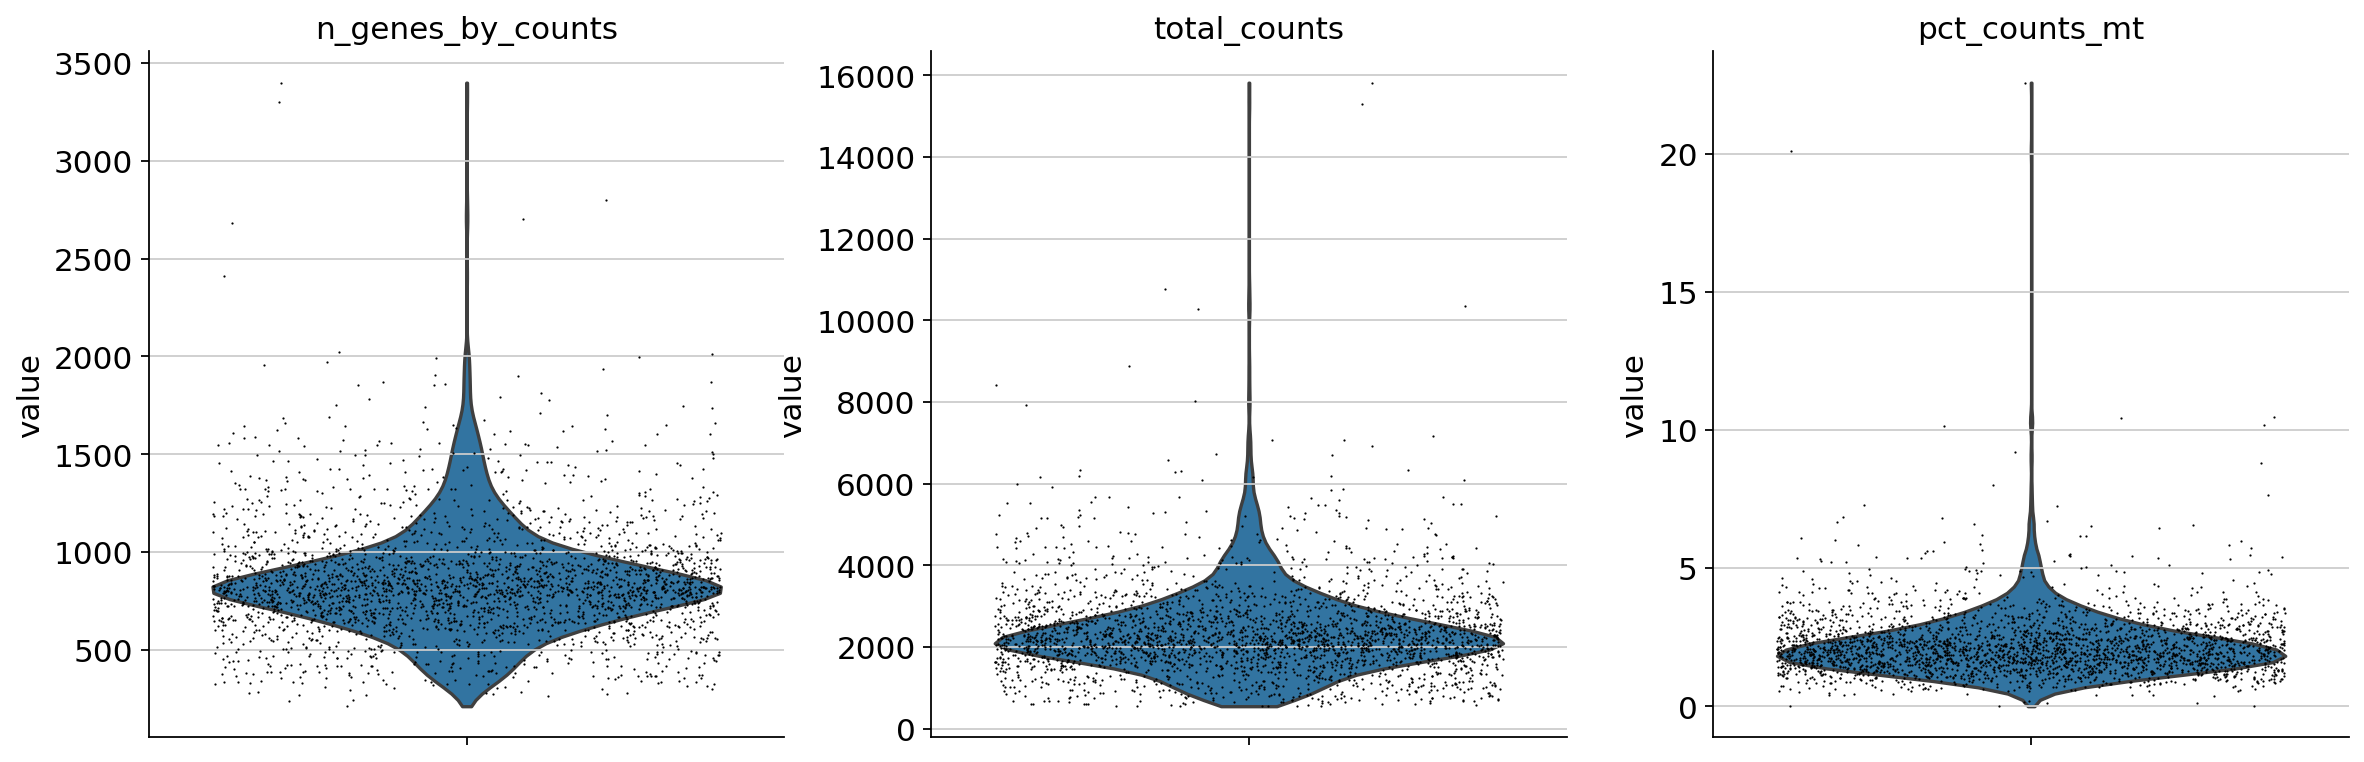

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

['n_genes_by_counts', 'total_counts', 'pct_counts_mt']: 

*   specifies the names of the QC metrics to be plotted


jitter=0.4:

*   controls the amount of random displacement
*   helps visualize overlapping points and improves the clarity of the plot.
 

multi_panel=True: The multi_panel parameter controls whether to create 

*   separate panels for each specified QC metric

Violin Plot for "n_genes_by_counts":

*   number of genes expressed in each cell.

*   width of the violin plot at a specific value show huw much density of cells are within that particular number of expressed genes.


Violin Plot for "total_counts":

*   represents the total number of RNA molecules (counts) detected in each cell.
*    helps identify any variations or outliers in terms of the overall RNA content of the cells.


Violin Plot for "pct_counts_mt":

*   represents the percentage of percentage of mitochondrial counts across the cells

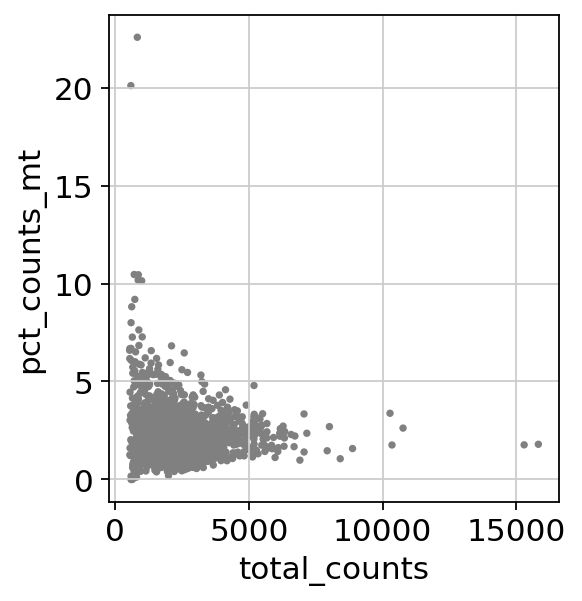

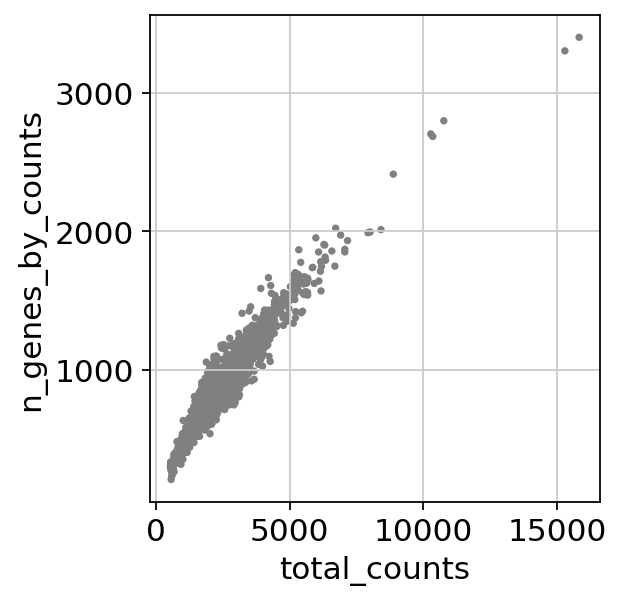

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

adata = adata[adata.obs.n_genes_by_counts < 2500, :]


*   keep only the cells where the number of genes expressed (n_genes_by_counts) is less than 2500.

adata = adata[adata.obs.pct_counts_mt < 5, :]

*   keep only the cells where the percentage of mitochondrial counts (pct_counts_mt) is less than 5.

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


The sc.pp.normalize_total()

used to normalize the total counts of each cell in the dataset. In the provided code, it is applied to the adata object with a target sum of 1e4 (10,000).

Normalization of total counts is necessary to ensure that the total counts of each cell are comparable. By normalizing the total counts, the expression values for each gene in each cell are scaled relative to the total expression of that cell. In this case, a target sum of 1e4 is set, meaning that the total counts of each cell will be rescaled so that they add up to 10,000.

By normalizing it allows for better comparisons between  that rely on normalized expression values, such as identification of differentially expressed genes or clustering of cells based on gene expression patterns.

In [ ]:
sc.pp.log1p(adata)

The sc.pp.log1p()

perform a logarithmic transformation on the data in adata. Specifically, it applies the natural logarithm (base e) to each element in the data matrix.
The purpose of the logarithmic transformation is to stabilize the variance and reduce the impact of extremely high expression values.

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


The sc.pp.highly_variable_genes() 
used to identify highly variable genes in the dataset. These are genes that exhibit significant variation in expression levels across cells.

min_mean: This parameter sets the minimum mean expression threshold for genes to be considered highly variable. Genes with mean expression values below this threshold will not be included as highly variable genes.

max_mean: This parameter sets the maximum mean expression threshold for genes to be considered highly variable. Genes with mean expression values above this threshold will not be included as highly variable genes.

min_disp: This parameter sets the minimum dispersion threshold for genes to be considered highly variable. Dispersion measures the biological variability of gene expression across cells. Genes with dispersion values below this threshold will not be included as highly variable genes.

These genes are marked as highly variable genes in the adata object for further analysis.

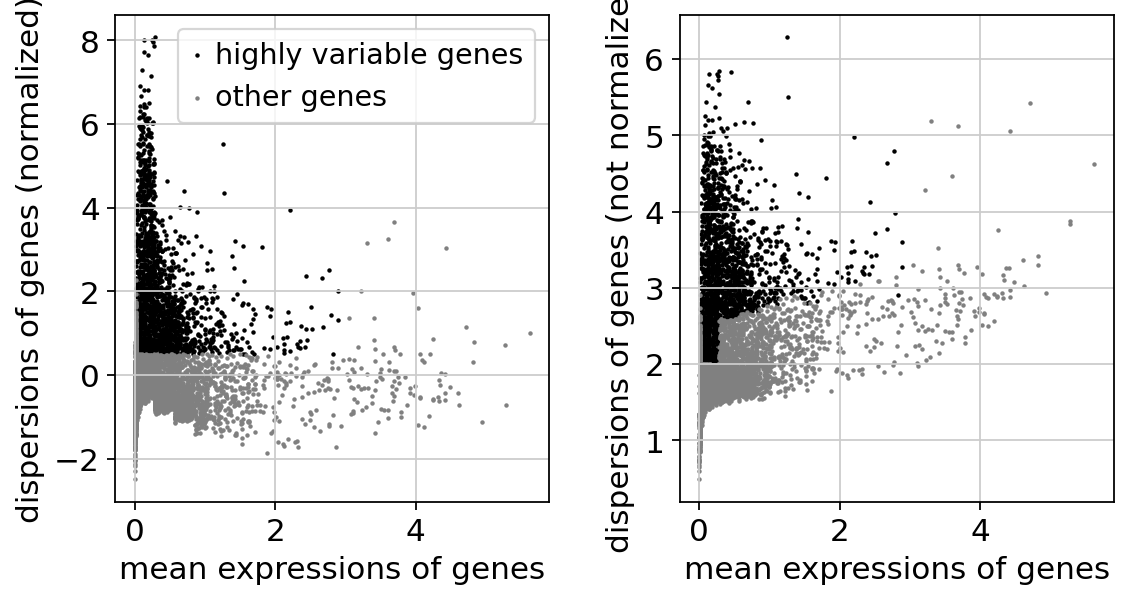

In [ ]:
sc.pl.highly_variable_genes(adata)

The sc.pl.highly_variable_genes() function is used to visualize the results of identifying highly variable genes in the dataset. It creates a plot showing the expression characteristics of the identified highly variable genes. The function automatically retrieves the highly variable genes from the adata object and plots their expression characteristics.

Mean Expression vs. Dispersion:

This panel shows the mean expression level (x-axis) versus the dispersion (y-axis) for each gene.
Highly variable genes are usually highlighted and labeled on the plot, allowing you to identify them easily.
The dispersion indicates the extent of variation in gene expression across cells.

In [ ]:
adata.raw = adata

assigns the current adata object to its raw attribute. 
This step is often performed to preserve the original unnormalized and unfiltered gene expression data for future reference

Preserving the raw data can be useful in several scenarios. For example, it allows you to compare the normalized and filtered data to the original raw data, or to apply alternative normalization or preprocessing methods in the future. It also enables you to access the original gene expression values if needed, even after applying various transformations or modifications to the dataset.

In [ ]:
adata = adata[:, adata.var.highly_variable]

The line adata = adata[:, adata.var.highly_variable]
include only the highly variable genes that were identified earlier.

By using this line of code, you are filtering the dataset. This operation effectively reduces the dimensionality of the dataset to focus only on the highly variable genes.

After this line of code, the adata object will contain only the highly variable genes.

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:10)


The sc.pp.regress_out() 
function remove unwanted sources of variation in the gene expression data. The purpose of regressing out these variables is to remove their influence on gene expression that is unrelated to the biological factors of interest.

'total_counts' and 'pct_counts_mt' These variables can introduce technical artifacts or confounding effects that are not biologically relevant. and enables a more accurate assessment of gene expression variations that are specifically associated with biological factors.

In [ ]:
sc.pp.scale(adata, max_value=10)

The sc.pp.scale()
used to scale the gene expression data in the adata object. It brings the gene expression values to a similar range and distribution.

In the provided code, the function is applied to the adata object with the parameter max_value set to 10. This parameter specifies the maximum value that the scaled expression values can take.

Scaling the data typically involves two steps:

Centering: The mean expression value of each gene across all cells is subtracted from the expression values of that gene in each individual cell. This centers the data around zero, ensuring that the mean expression for each gene is approximately zero.

Scaling: The centered expression values are divided by the standard deviation of the gene's expression across all cells. This scales the data, making the variance of each gene approximately one.

By scaling the data, it ensures that the expression values of different genes are on a similar scale and have comparable variances.

Setting max_value to 10 in the sc.pp.scale() function limits the scaled expression values to a maximum of 10, ensuring that the values remain within a reasonable range.

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


The sc.tl.pca() 
used to perform principal component analysis (PCA). PCA is a dimensionality reduction technique.

The svd_solver parameter specifies the algorithm used to perform the singular value decomposition (SVD) required for PCA. 'arpack' is one of the available solvers in Scanpy and is often suitable for large-scale datasets.

During PCA, the gene expression data is transformed into a set of principal components (PCs). Each PC represents a different pattern of variation in the data. The PCs are ordered by the amount of variance they capture, with the first PC capturing the largest amount of variance, the second PC capturing the second largest amount, and so on.

By applying PCA It helps to identify the most important sources of variation and visualize the cells in a reduced-dimensional space.

After applying the sc.tl.pca() function, the PCA results will be stored in the adata object, accessible through adata.obsm['X_pca'].

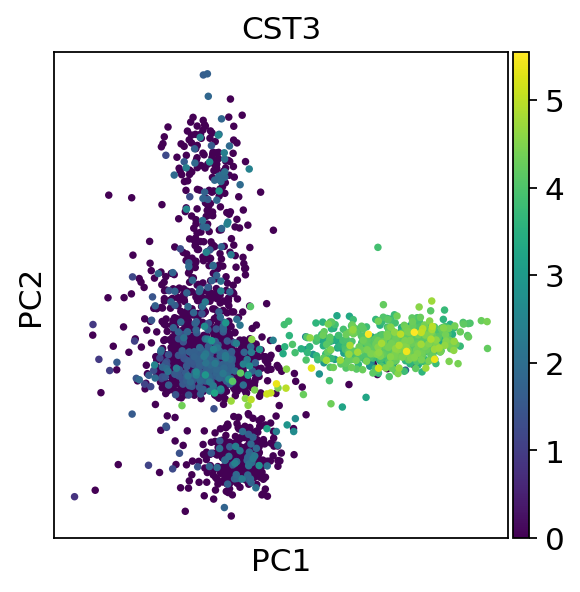

In [ ]:
sc.pl.pca(adata, color='CST3')

The sc.pl.pca() 
x-axis represents the values of the first principal component (PC1), and the y-axis represents the values of the second principal component (PC2). Each cell is positioned in the plot according to its scores along these two principal components.

The color of each point corresponds to how much of the gene 'CST3' is expressed in that perticular cell.

By visualizing the cells in the PCA space and coloring them based on the expression levels of a specific gene, you can identify any patterns, clusters, or relationships between the gene of interest and the underlying cell populations. This information can provide insights into how the gene 'CST3' contributes to the overall variation captured by the principal components and its potential relevance in the biological context of the study.

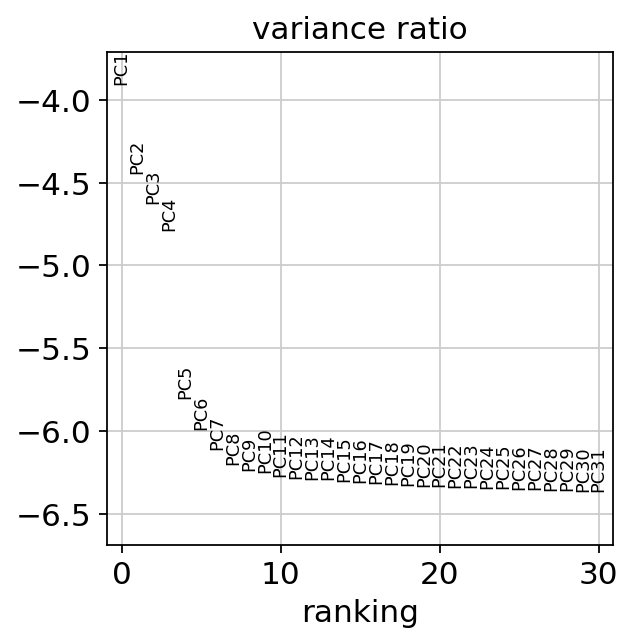

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)



plot how much variance PCs are contributing to. allowing you to assess how
many PCs are necessary to capture a significant variance in the data.

By setting log=True, the y-axis of the plot will be logarithmically scaled, which can be useful where the values on the axis are not evenly spaced. For example, if the variance ratios range from very small values (e.g., 0.001) to larger values (e.g., 0.5), using a logarithmic scale can help visualize the differences in variance ratios more effectively.

x-axis represents the principal components (PCs) in descending order (PC1, PC2, PC3, etc.) and the y-axis represents range of how much variance is created.

By examining the plot, you can identify the principal components that contribute the most to the overall variance in the data. 

This plot helps in determining the optimal number of principal components to use. and discarding with less contributions.

In [ ]:
adata.write(results_file)

In [ ]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


compute the neighborhood relationships between cells in a dataset. Neighbors are computed based PCs.

In the provided code, adata is the AnnData object containing the pre-processed and analyzed data. The function sc.pp.neighbors() is applied to this object with the following parameters:

n_neighbors: This parameter specifies the number of nearest neighbors to consider for each cell. In this case, n_neighbors=10 means that the algorithm will identify the 10 nearest neighbors for each cell in the dataset.

n_pcs: number of PCs to use for computing the neighbor relationships.

By calculating the neighborhood relationships, the function creates a graph representation of the dataset where each cell is connected to its nearest neighbors.

In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


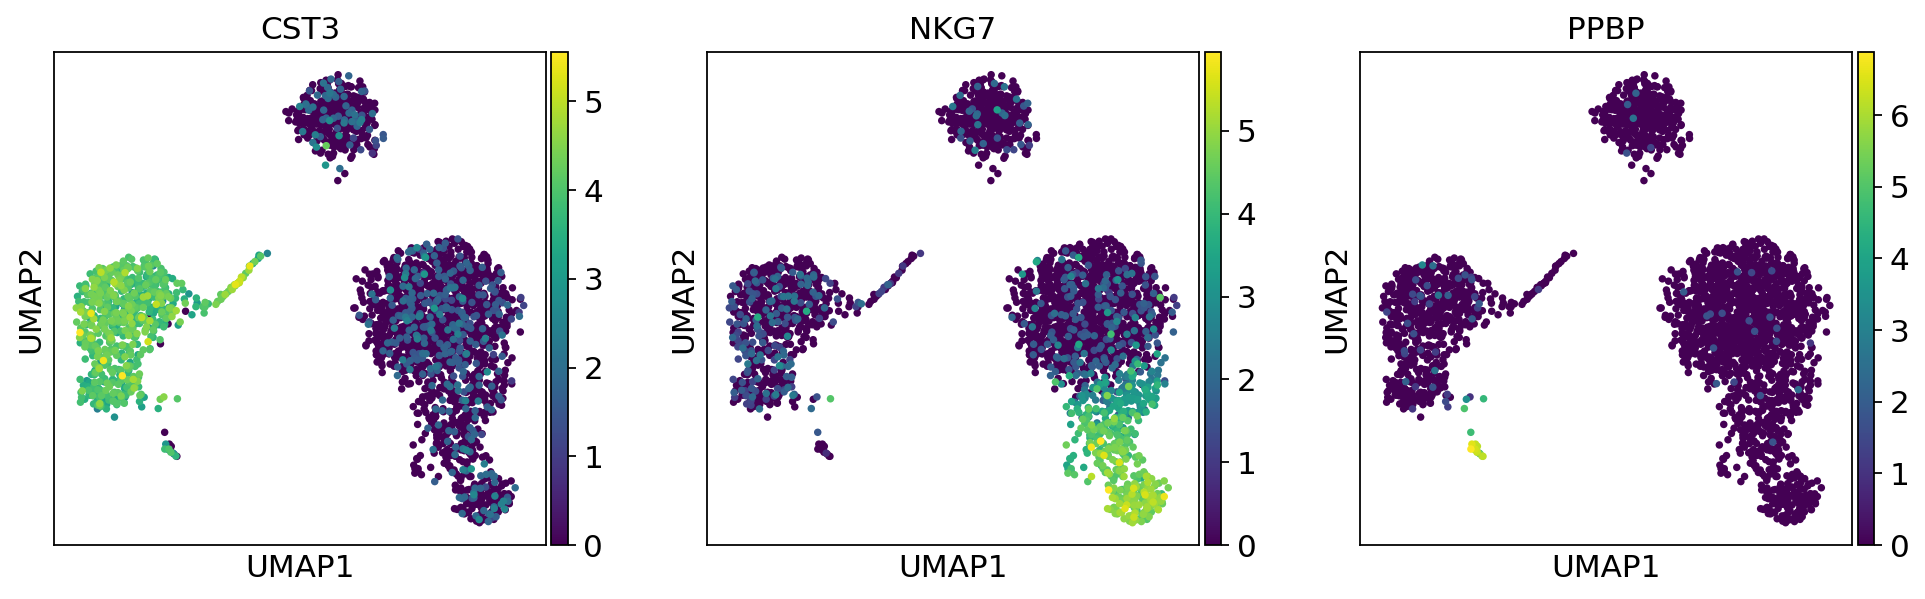

In [ ]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP']) 

The sc.tl.umap() compute the UMAP (Uniform Manifold Approximation and Projection). 

UMAP is a dimensionality reduction technique. 

The UMAP algorithm seeks to place cells closer together that are more similar to each other in terms based on their gene expression profiles and the neighborhood relationships computed earlier using sc.pp.neighbors().

Here, sc.tl.umap(adata) is applied to the adata object, which contains the pre-processed and analyzed data.



In [ ]:
!pip install leidenalg


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.4 MB/s eta 0:00:00


In [ ]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


The sc.tl.leiden() performs the Leiden algorithm for clustering cells based on their gene expression profiles. The Leiden algorithm is a graph-based clustering algorithm.

Build a graph: The algorithm starts by creating a graph where each cell is a point in the graph.

Connect similar cells: The algorithm calculates the similarities between them cells. Cells that have similar patterns are connected in the graph using lines or edges.

Initialize clusters: At the beginning, each cell is assigned to its own cluster. This means that every cell is considered as a separate group.

Iterate for improvement: The algorithm iterates through the cells and evaluates if moving a cell to a different cluster or forming a new cluster would improve the output. It looks for ways to rearrange the cells to increase the similarity within clusters and reduce the similarity between clusters.

Repeat until best: The algorithm keeps iterating and making changes to the clusters until it finds the best grouping.

Final clusters:

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


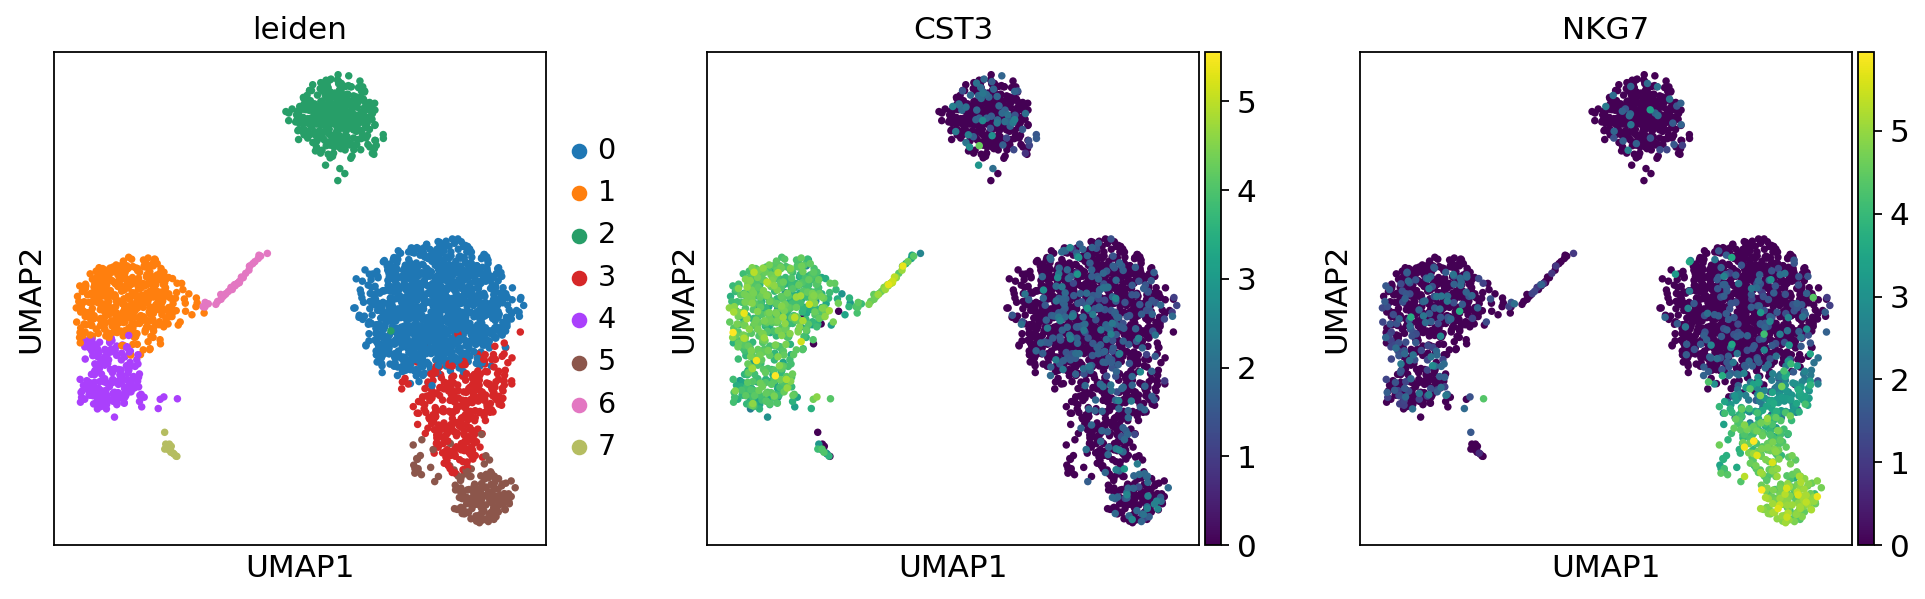

In [ ]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [ ]:
#@title Clustering the neighborhood graph

In [ ]:
sc.tl.leiden(adata) #perform the Leiden algorithm for clustering cells based on their gene expression profiles.

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
